In [1]:
import os
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
root = "./data"
txt_path = os.path.join(root, "train.txt")

a = pd.read_csv(txt_path, sep=" ", names= ["path", "label"])
a

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


In [3]:
root = "./data"
txt_path = os.path.join(root, "train.txt")
labels = []
img_paths = []
with open(txt_path, 'r') as file:
    for line in file:
# Remove any trailing characters like newlines or spaces
        line = line.strip().split(" ")
        # print("img: ", line[0])
        # print("label: ", int(line[1])) 
        labels.append(int(line[1]))
        img_paths.append(line[0])
data = pd.DataFrame({"path":img_paths,"label":labels})
data

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


<Axes: >

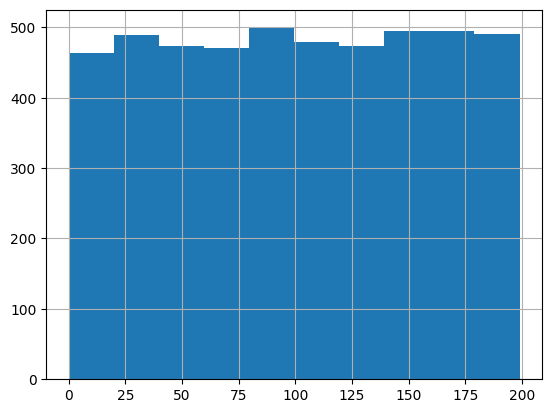

In [4]:
data.label.hist()

In [5]:
from utils.utils import get_dataloader
from torchvision import datasets, transforms
batch_size = 4
data_path = "./data"
import torchvision.transforms as transform
from torchvision.transforms import v2
import torchvision
train_transformer = transform.Compose([
                           transform.Resize((384, 380)),
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])


test_transformer = transform.Compose([
                           transform.Resize((384, 380)),
                           
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])
shuffle = True
compact = False

train_loader,test_loader = get_dataloader(data_path = data_path, train_transform = train_transformer, test_transform = test_transformer, batch_size = batch_size, shuffle = shuffle, compact = compact)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2496443..2.4870443].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2376478..2.527538].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2376478..2.5005424].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2016585..2.5545337].


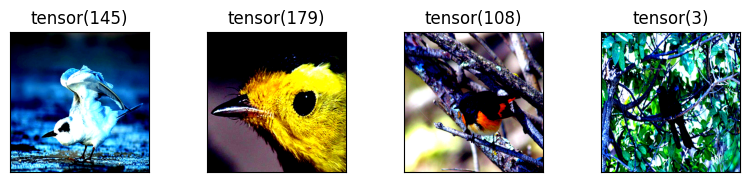

In [6]:
import numpy as np
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(labels[idx])

In [20]:
from trainer import Trainer
import torch
from model.baseline import BirdClassifier, EfficientBirdClassifier
model = EfficientBirdClassifier()
model.load_state_dict(torch.load('/home/endtheme/git/bird-class/checkpoints/baseline_efficientnet/Epoch_20.pth'))




<All keys matched successfully>

In [24]:
from utils.utils import calculate_classwise_accuracy

calculate_classwise_accuracy(model, test_loader, num_classes = 200)

([85.71428571428571,
  40.0,
  80.0,
  85.71428571428571,
  40.0,
  100.0,
  100.0,
  66.66666666666667,
  60.0,
  40.0,
  40.0,
  16.666666666666668,
  80.0,
  57.142857142857146,
  16.666666666666668,
  50.0,
  40.0,
  50.0,
  57.142857142857146,
  0.0,
  50.0,
  0.0,
  40.0,
  0.0,
  33.333333333333336,
  40.0,
  33.333333333333336,
  85.71428571428571,
  0.0,
  66.66666666666667,
  71.42857142857143,
  50.0,
  28.571428571428573,
  20.0,
  50.0,
  25.0,
  71.42857142857143,
  14.285714285714286,
  16.666666666666668,
  33.333333333333336,
  85.71428571428571,
  60.0,
  28.571428571428573,
  75.0,
  33.333333333333336,
  14.285714285714286,
  40.0,
  28.571428571428573,
  14.285714285714286,
  100.0,
  16.666666666666668,
  50.0,
  100.0,
  83.33333333333333,
  20.0,
  100.0,
  75.0,
  60.0,
  20.0,
  42.857142857142854,
  40.0,
  20.0,
  50.0,
  0.0,
  66.66666666666667,
  33.333333333333336,
  40.0,
  0.0,
  85.71428571428571,
  83.33333333333333,
  50.0,
  66.66666666666667,
  85

In [25]:
from utils.utils import calculate_top1_accuracy
calculate_top1_accuracy(model, test_loader)

42.60797342192691

In [23]:
from trainer import Trainer
import torch
from model.baseline import BirdClassifier, EfficientBirdClassifier
model = BirdClassifier()
model.load_state_dict(torch.load('/home/endtheme/git/bird-class/checkpoints/baseline_resnet/Epoch_20.pth'))



2048


<All keys matched successfully>